In [73]:
#Import Libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [74]:
#Visualize data
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [75]:
#Import the data

movies = pd.read_csv("C:/Users/dogbe/OneDrive/Documents/movies.csv")

Exploring the data

In [76]:
#View first few rows of the data

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [77]:
#Number of rows and columns

movie_shape = movies.shape
print(f'The data has {movie_shape} rows and columns respectively')

The data has (7668, 15) rows and columns respectively


In [78]:
#Data Types of each Col

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [79]:
#Insights for the numeric figures

movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [80]:
#Non-Numeric Figures Insights

movies.describe(exclude= "number")

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


Cleaning Data


In [ ]:
#Full Overview of Nulls
movies[movies.isnull().any(axis = 1)]

In [84]:
#Percentage of each Column that is null

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [85]:
#Number of Values that are null

movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [86]:
#Remove the rows with Nulls

movies = movies.dropna()
movies.shape

(5421, 15)

In [87]:
#Comfirm if there are still nulls in the data

movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [88]:
#Convert  columns from Float to Int

movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
#Check for Duplicates

movies.sort_values(by=['gross'], inplace = False, ascending = False)

In [91]:
movies['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [92]:
movies[(movies.duplicated(keep = 'first'))]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [93]:
#No duplicates found in the data as shown above but if there's any missed the follwing will handle that.

movies.drop_duplicates()
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Insights into the Data - Visualization



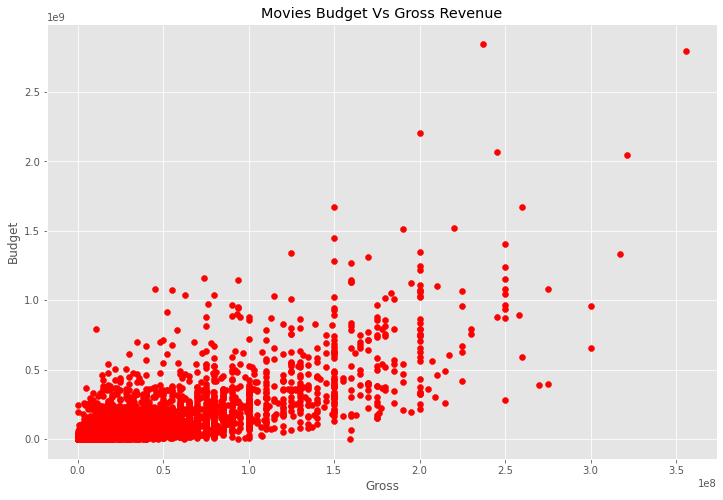

In [95]:
#Plot of Budget Vs Gross using Scatter plot

plt.scatter(x =movies['budget'], y = movies['gross'], color = 'red')

plt.title('Movies Budget Vs Gross Revenue')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

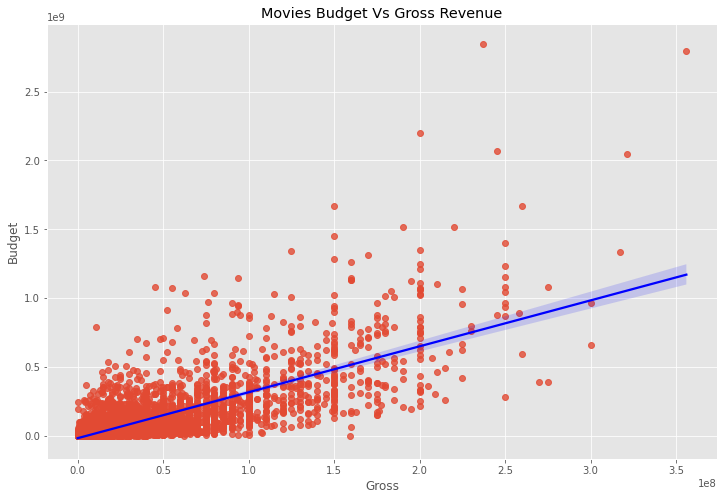

In [96]:


#Plot of Budget Vs Gross using Seaboarn plot

sns.regplot(x = 'budget', y = 'gross',data = movies, line_kws={"color": "blue"})
plt.title('Movies Budget Vs Gross Revenue')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

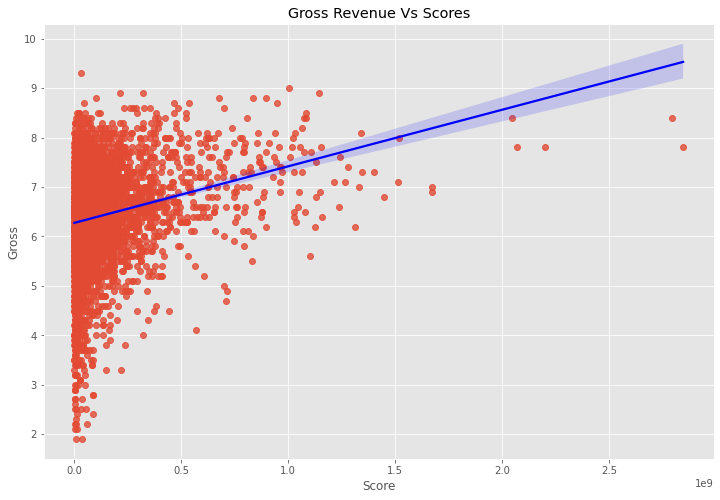

In [97]:
#Plot of Gross Vs Scores using Seaboarn plot

sns.regplot(x = 'gross', y = 'score',data = movies, line_kws={"color": "blue"})
plt.title('Gross Revenue Vs Scores')
plt.xlabel('Score')
plt.ylabel('Gross')
plt.show()

Check for correlation

In [98]:
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [99]:
#Checking for correlation using pearson, kendall and spearman correlation methods
movies.corr(method='pearson')
#movies.corr(method='kendall')
#movies.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


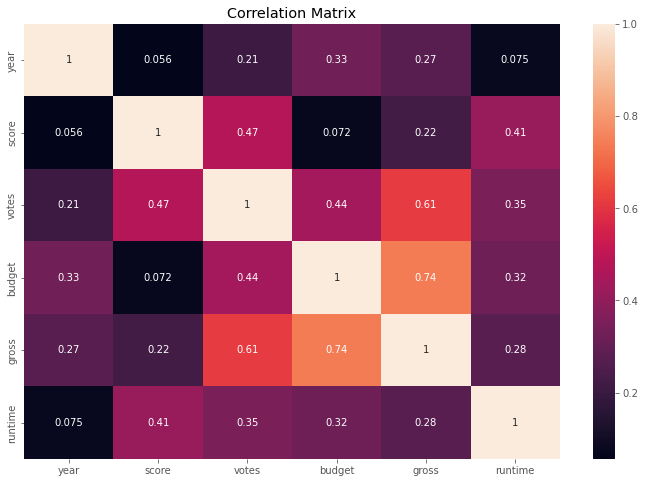

In [100]:
#Visualize the correlation using seaboarn heatmap
correlation_matrix = movies.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

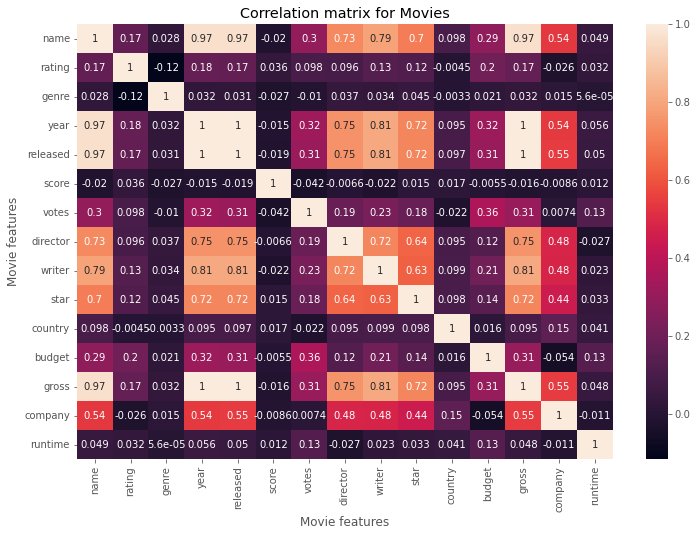

In [101]:
#Detailed visualization of correlation 

correlation_matrix = movies.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [102]:
correlation_mat = movies.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.169808
          genre       0.028413
          year        0.965461
          released    0.966086
          score      -0.020083
          votes       0.297305
          director    0.725411
          writer      0.791872
          star        0.695124
          country     0.098110
          budget      0.288955
          gross       0.967925
          company     0.535369
          runtime     0.048980
rating    name        0.169808
          rating      1.000000
          genre      -0.116507
          year        0.179456
          released    0.171063
          score       0.036114
          votes       0.097619
          director    0.096014
          writer      0.128909
          star        0.115694
          country    -0.004547
          budget      0.203698
          gross       0.172703
          company    -0.026286
          runtime     0.032265
genre     name        0.028413
          rating     -0.116507
        

In [103]:
#Paring up features and their correlations

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

rating    genre      -0.116507
genre     rating     -0.116507
budget    company    -0.053573
company   budget     -0.053573
score     votes      -0.041981
votes     score      -0.041981
score     genre      -0.027402
genre     score      -0.027402
runtime   director   -0.026918
director  runtime    -0.026918
rating    company    -0.026286
company   rating     -0.026286
country   votes      -0.021562
votes     country    -0.021562
writer    score      -0.021538
score     writer     -0.021538
name      score      -0.020083
score     name       -0.020083
released  score      -0.019486
score     released   -0.019486
gross     score      -0.015744
score     gross      -0.015744
          year       -0.014594
year      score      -0.014594
runtime   company    -0.010695
company   runtime    -0.010695
votes     genre      -0.009983
genre     votes      -0.009983
company   score      -0.008555
score     company    -0.008555
          director   -0.006583
director  score      -0.006583
budget  

In [104]:
#Features with High Correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

company   name        0.535369
name      company     0.535369
company   year        0.537731
year      company     0.537731
gross     company     0.545924
company   gross       0.545924
released  company     0.546033
company   released    0.546033
star      writer      0.626647
writer    star        0.626647
director  star        0.636705
star      director    0.636705
          name        0.695124
name      star        0.695124
director  writer      0.717990
writer    director    0.717990
star      year        0.719373
year      star        0.719373
released  star        0.720076
star      released    0.720076
          gross       0.720811
gross     star        0.720811
director  name        0.725411
name      director    0.725411
director  year        0.747785
year      director    0.747785
director  released    0.750825
released  director    0.750825
director  gross       0.751737
gross     director    0.751737
writer    name        0.791872
name      writer      0.791872
writer  

In [ ]:
# Conclusion
# Based on the final results of the correlation, the year of release had a high correlation with the gross revenue generated from the movie
# The Company and the nme of the movie had the lowest rate of correlation.